In [4]:
import numpy as np
import pickle
from netCDF4 import Dataset
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

# Import the Land-Sea Mask data

In [34]:
fname = "ERA_landsea_mask.nc"
rootgrp = Dataset(fname, 'r')
landsea_mask = np.flip(np.squeeze(rootgrp.variables['lsm'][:]), axis=0)
LAT = np.flip(rootgrp.variables['latitude'][:], axis=0)
LON = rootgrp.variables['longitude'][:]

# Import the ERA-interim Annually Averaged Precipitation

In [4]:
with open("avg_precip.txt", "rb") as f:
    precip = pickle.load(f)

avg_precip = precip["monthly_precip"] * (365/1000.0) #convert mm/day to m/year

# Plot the map of the precipitation

Text(0.5,1,'Annual Mean Precipitation 1979-2018 ERA-interim')

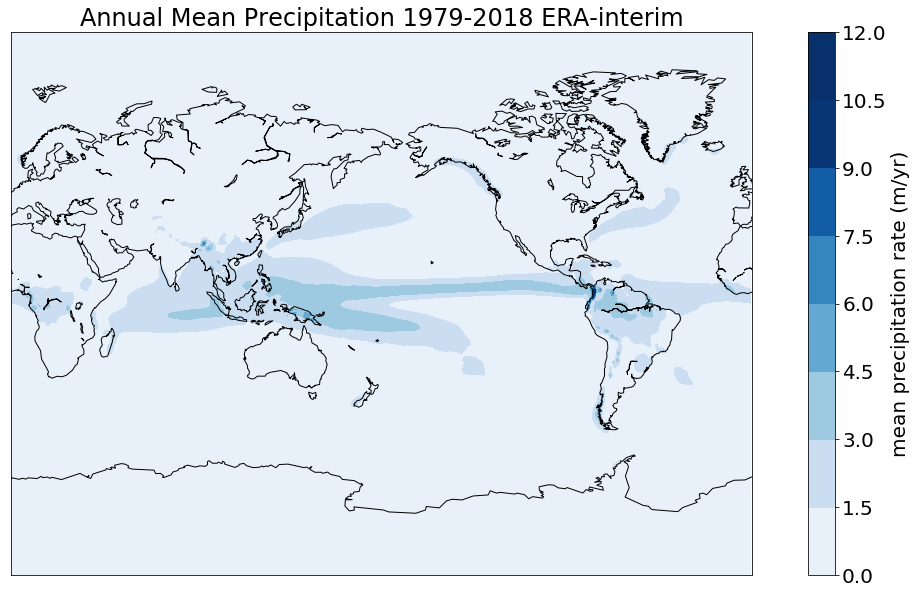

In [30]:
fig=plt.figure(figsize=(20,10))
m = Basemap(projection='mill',lon_0=180)
lons, lats = np.meshgrid(LON, LAT)
xi, yi = m(lons, lats)
cs = m.contourf(xi, yi, avg_precip, vmin=0,vmax=10, cmap=plt.get_cmap("Blues"))
m.drawcoastlines(color="black")
cbar = plt.colorbar(cs)
cbar.set_label('mean precipitation rate (m/yr)')
plt.title('Annual Mean Precipitation 1979-2018 ERA-interim')

# Get Zonal Mean (Land Only)

In [36]:
land_precip = np.where(landsea_mask==1, avg_precip, np.nan)

In [39]:
zonal_land_mean = np.nanmean(land_precip, axis=1)

/global/u2/j/jiabin/.conda/envs/netcdf-env/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Zonally-Averaged Land Mean Precipitation')

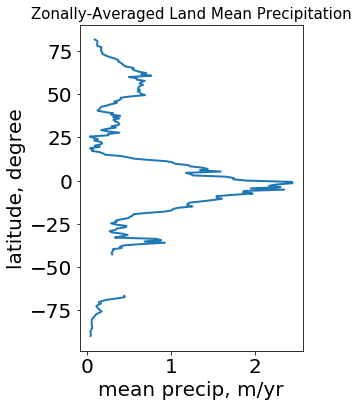

In [47]:
figure = plt.figure(figsize=(4,6))
plt.plot(zonal_land_mean, LAT)
plt.xlabel('mean precip, m/yr')
plt.ylabel('latitude, degree')
plt.title('Zonally-Averaged Land Mean Precipitation', fontsize=15)